In [97]:
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

### The aim of this assignment is to predict auto insurance pricing using ML algorithms

## 4. Multivariate analysis to capture relation between features and target

## 3. Univariate analysis of features and target

## 1. Loading the data

In [98]:
dataset = pd.read_csv('data_train_insurance.csv',sep=';')
dataset_types = pd.read_csv('data_type.csv', sep=';')

In [99]:
dataset.shape

(9983, 40)

In [100]:
dataset.head()

,Id,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,...,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
0,1638099,435.0,BASIC,2,0,4600,1,1,1,1,...,59,2,5,1,-99,-1,2,1125,-1.790876,-0.431147
1,1657342,609.0,FULL,1,0,68315,1,1,1,2,...,106,2,17,1,2,-1,2,1510,1.675824,-4.431147
2,1657529,609.0,FULL,1,0,68315,1,1,1,2,...,106,2,17,1,2,-1,2,1510,1.675824,-4.431147
3,1662071,404.0,FULL,1,2,11005,1,1,1,2,...,51,2,6,2,1,31,2,1170,-0.440876,1.285553
4,1662074,404.0,FULL,1,2,11005,1,1,1,2,...,51,2,6,2,1,31,2,1170,-0.440876,1.285553


## 2. Analysis of missing values

### Detection of null values

In [101]:
dataset.isnull().sum(axis=0)

Id                               0
Response_Market_Index            0
PROD_Formula                     0
PER_sex                          0
PER_Sex_Second_Driver            0
VEH_Actual_Value                 0
CLA_HISTORY                      0
CLA_HISTORY_1Y                   0
CLA_HISTORY_3Y                   0
CLA_BM_TPL_DECLARED              0
BEH_Mileage                      0
PER_KIDS_ON_BOARD_ID             0
VEH_Number_of_doors              0
VEH_Top_Speed                    0
BEH_Number_Year_Insured          0
VEH_TransmissionId               0
PER_Age_Main_Driver              0
PER_License_Age_Main_Driver      0
PER_License_Age_Second_Driver    0
PER_Matrimonial_Status           0
VEH_Age                          0
VEH_Injection_Mode               0
VEH_fuel_type                    0
BEH_vehicule_usage               0
VEH_Drive_type                   0
VEH_Body                         0
VEH_Segment                      0
PER_Parking_Type                 0
CLA_BM              

We can see that the dataset has no `NaN` values, however it does not mean there are no null values. We want to check each column for values that represent a null value. The first column `Id` has a high cardinality which is normal, and it has exactly 9983 unique values. There are columns like `??? ` where we can see `?` as a value. This is a good example of 'non-null null values'. We can also note `-1` and `-99` as null values for features like `PER_Second_Driver_Age` and `PER_Age_oldest_child` because we cannot have a negative age. The feature `SEX` is a bit of a challenge because there are three different values. Two of them are male and female, but the third can be 'unknown' or 'prefer not to say' for example. Without proper documentation on the dataset it is difficult to say which is which.

In [102]:
for column in dataset:
  print (dataset[column].value_counts())


1710083    1
1675935    1
1686162    1
1671829    1
1710742    1
          ..
1664342    1
1699159    1
1713289    1
1662297    1
1689599    1
Name: Id, Length: 9983, dtype: int64
349.00     146
319.00     136
339.00     120
309.00     114
279.00     102
          ... 
444.21       1
1143.00      1
1097.36      1
295.02       1
1159.00      1
Name: Response_Market_Index, Length: 2061, dtype: int64
FULL     6343
BASIC    3640
Name: PROD_Formula, dtype: int64
1    7628
2    2355
Name: PER_sex, dtype: int64
0    8402
2    1082
1     499
Name: PER_Sex_Second_Driver, dtype: int64
0        107
2900      67
6800      49
5900      48
2300      47
        ... 
11715      1
96500      1
22800      1
19316      1
10227      1
Name: VEH_Actual_Value, Length: 2326, dtype: int64
1     8413
2     1128
11     392
?       50
Name: CLA_HISTORY, dtype: int64
1     9485
2      360
11      88
?       50
Name: CLA_HISTORY_1Y, dtype: int64
1     8882
2      823
11     228
?       50
Name: CLA_HISTORY_3Y, dty

In [103]:
dataset = dataset.replace('?', np.nan)

I choose not to set as `NaN` cells with values `-99` or `-1` for the columns `['PER_Second_Driver_Age','PER_Age_oldest_child','PER_previous_insurer','PER_License_Age_Second_Driver','VEH_Top_Speed','CLA_BM_TPL_DECLARED']`. They may all referencing null or missing values, but without proper documentation it is difficult to be sure. The value `-1` in the column `PER_previous_insurer` for example may be a code for an insurer abroad or an insurer that is not in the market anymore. Setting those values as null values also mixes up values that were previously defined as `?` and `-99` or `-1` for this set of columns.

In [104]:
for column in dataset:
    print (dataset[column].value_counts())

1710083    1
1675935    1
1686162    1
1671829    1
1710742    1
          ..
1664342    1
1699159    1
1713289    1
1662297    1
1689599    1
Name: Id, Length: 9983, dtype: int64
349.00     146
319.00     136
339.00     120
309.00     114
279.00     102
          ... 
444.21       1
1143.00      1
1097.36      1
295.02       1
1159.00      1
Name: Response_Market_Index, Length: 2061, dtype: int64
FULL     6343
BASIC    3640
Name: PROD_Formula, dtype: int64
1    7628
2    2355
Name: PER_sex, dtype: int64
0    8402
2    1082
1     499
Name: PER_Sex_Second_Driver, dtype: int64
0        107
2900      67
6800      49
5900      48
2300      47
        ... 
11715      1
96500      1
22800      1
19316      1
10227      1
Name: VEH_Actual_Value, Length: 2326, dtype: int64
1     8413
2     1128
11     392
Name: CLA_HISTORY, dtype: int64
1     9485
2      360
11      88
Name: CLA_HISTORY_1Y, dtype: int64
1     8882
2      823
11     228
Name: CLA_HISTORY_3Y, dtype: int64
1     6649
-1    1139
7

In [95]:
dataset.isnull().sum(axis=0)

Id                                  0
Response_Market_Index               0
PROD_Formula                        0
PER_sex                             0
PER_Sex_Second_Driver               0
VEH_Actual_Value                    0
CLA_HISTORY                        50
CLA_HISTORY_1Y                     50
CLA_HISTORY_3Y                     50
CLA_BM_TPL_DECLARED                50
BEH_Mileage                        50
PER_KIDS_ON_BOARD_ID               50
VEH_Number_of_doors               766
VEH_Top_Speed                      50
BEH_Number_Year_Insured            50
VEH_TransmissionId                 50
PER_Age_Main_Driver                50
PER_License_Age_Main_Driver        50
PER_License_Age_Second_Driver    1052
PER_Matrimonial_Status           1052
VEH_Age                            50
VEH_Injection_Mode               2563
VEH_fuel_type                      50
BEH_vehicule_usage                 50
VEH_Drive_type                     50
VEH_Body                           50
VEH_Segment 

In [108]:
import missingno as msno

<AxesSubplot:>

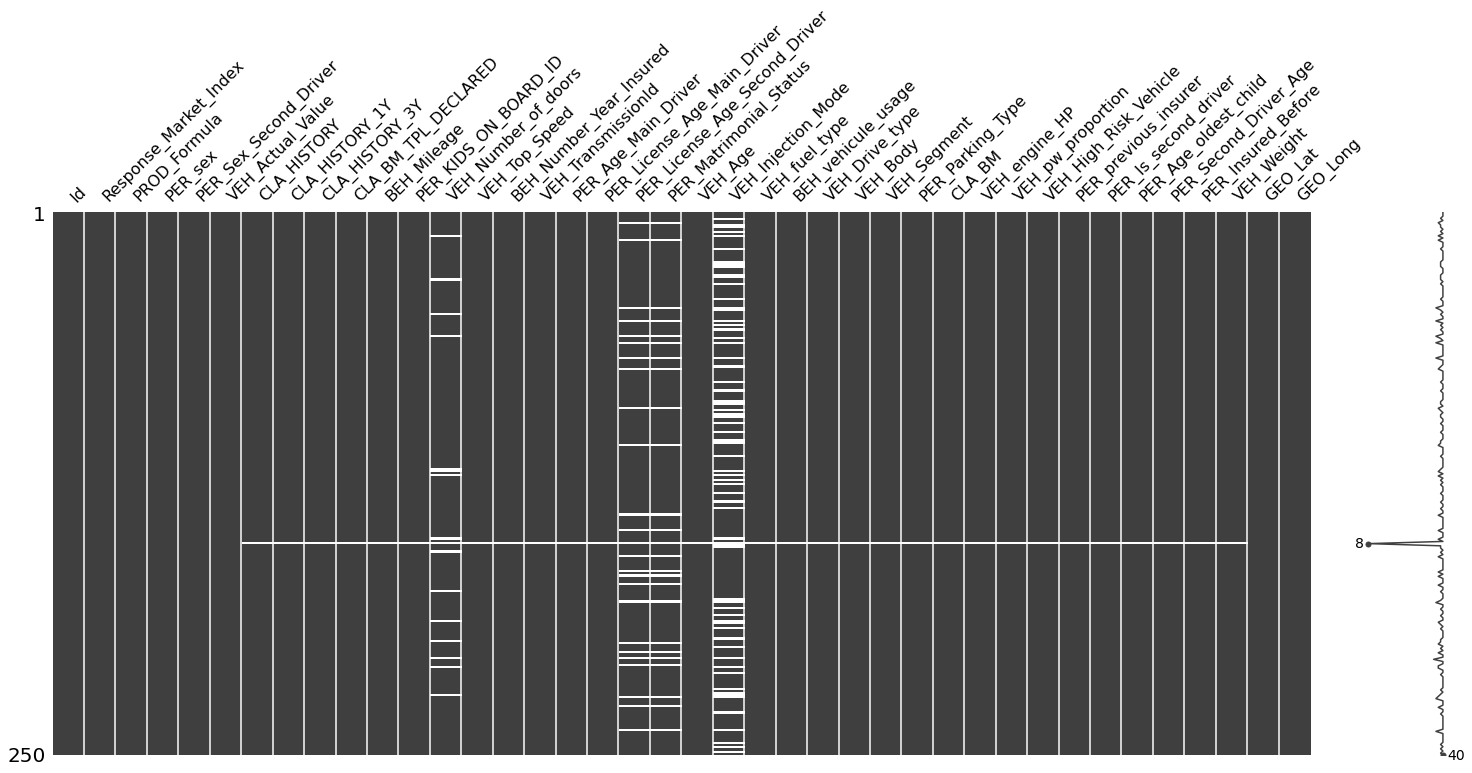

In [113]:
%matplotlib inline
msno.matrix(dataset.sample(250))

<AxesSubplot:>

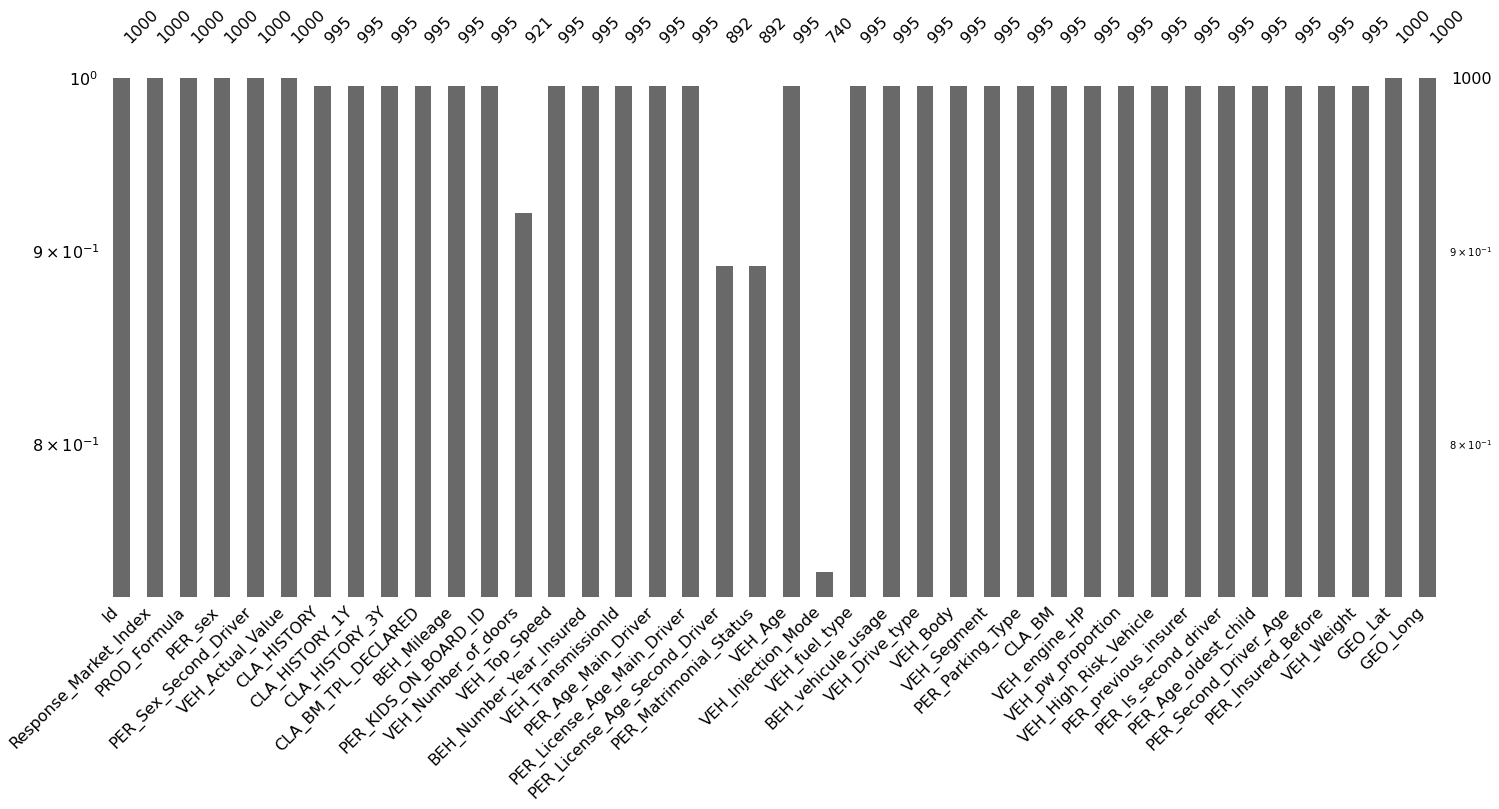

In [112]:
msno.bar(dataset.sample(1000),log=True)

<AxesSubplot:>

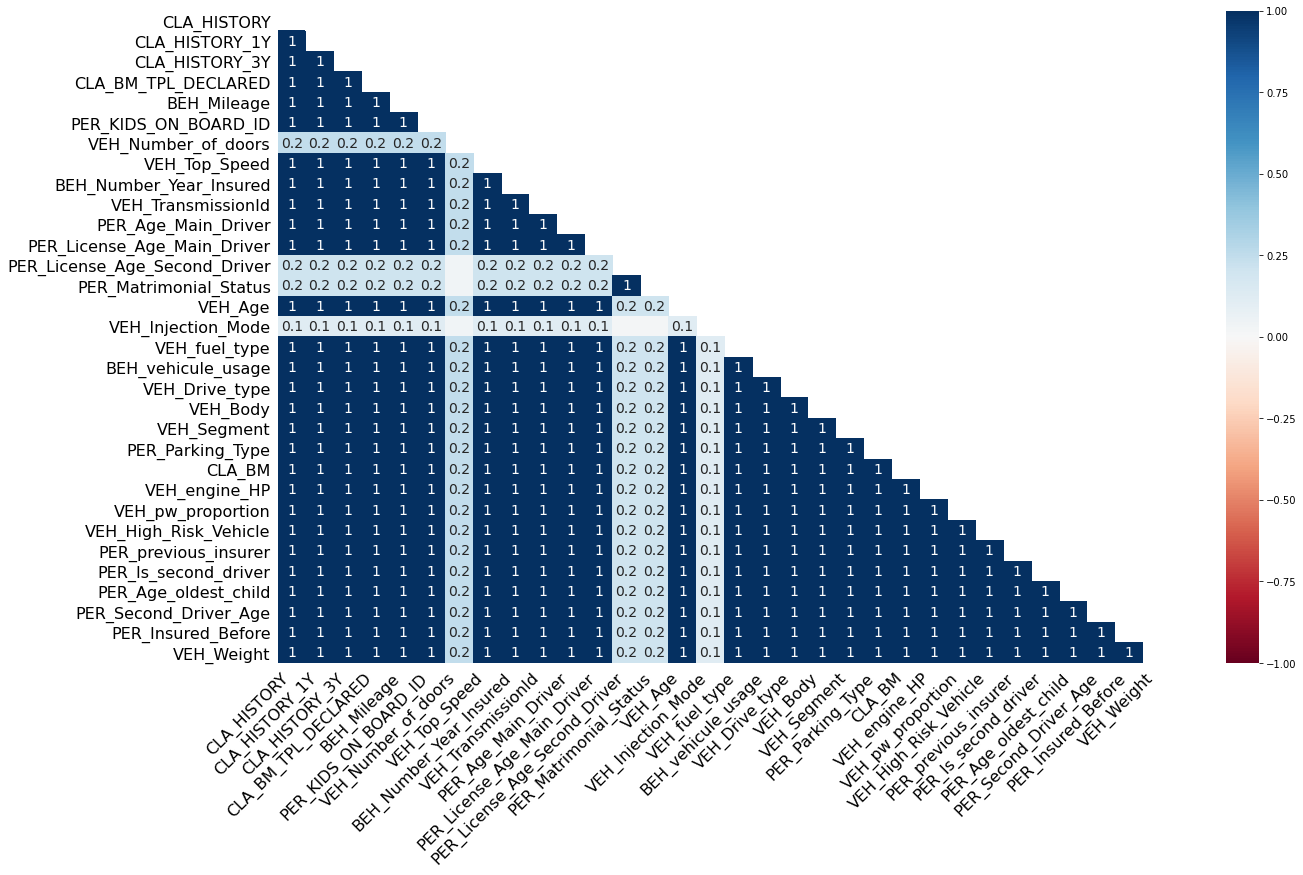

In [114]:
msno.heatmap(dataset)